# KNN - Correntes de motor

Testando 30 rodadas com algoritmo **KNN** nos conjuntos de dados de correntes de motor com dados extraídos por _dwt_.

## Importando Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

## Declarando funções

In [3]:
def load_correntes():
    '''Retorna os 3 arquivos carregados em um único array'''
    return np.append(
                arr=np.load("corrente1.npy"),
                axis=0,
                values=np.append(
                        arr=np.load("corrente2.npy"),
                        values=np.load("corrente3.npy"),
                        axis=0))

def binarize(matriz7x7):
    '''Recebe a matriz de confusão (7, 7) e retorna uma matriz (2, 2) com seus elementos agrupados'''
    mBinaria = np.array([[0, 0],[0, 0]])

    for linha in range(7):
        if linha == 0:
            mBinaria[0] = [matriz7x7[0][0], sum(matriz7x7[0][1:])]
        else:
            mBinaria[1] += [matriz7x7[linha][0], sum(matriz7x7[linha][1:])]

    return mBinaria

def normalize(line):
    '''Recebe uma linha da matriz e a retorna normalizada em relação ao total de elementos da linha'''
    total = sum(line)
    return np.array([x / total for x in line])

def test_30_knn(x, y, y_labels, k_vizinhos):
    '''
    Executa 30 rodadas com KNN, imprimindo o resultado da classificação e plotando a matriz de confusão.

    Ao final, retorna 3 listas, contendo a acurácia, a sensibilidade e a matriz de confusão (não normalizada) ao longo das 30 rodadas, respectivamente.
    '''
    # Armazena os resultados de acurácia, sensibilidade e matriz de confusão que ao final serão retornados
    irisAcc = []
    irisRec = []
    matrixProdada = []

    # Armazena as sementes já usadas para não haver repetição
    usedSeed = []

    for i in range(30):

        # Gerando inteiro aleatório para distribuição dos dados
        semente = randint(0, 8001)
        
        while semente in usedSeed:
            semente = randint(0, 8001)
        
        usedSeed.append(semente)

        # Separando dados para treino e teste
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=semente)

        # Instanciando classificador
        classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

        # Treinando modelo
        classifier.fit(X_train, y_train)

        # Realizando teste de classificação
        y_pred = classifier.predict(X_test)

        # Adicionando resultados à lista
        acc = accuracy_score(y_test, y_pred)
        irisAcc.append(acc)

        rec = recall_score(y_test, y_pred, average=None)
        irisRec.append(rec)

        matrixProdada.append(confusion_matrix(y_test, y_pred, normalize=None))

        # Exibindo resultados da rodada
        print(f"\n- RODADA {i} - Semente {semente} -\n")
        print("- Acurácia {accuracy} -\n- Sensibilidade {recall} -\n".format(accuracy=acc, recall=rec))

        print(classification_report(y_test, y_pred, target_names=y_labels))

        print("Matriz de confusão normalizada")
        plot_confusion_matrix(
            estimator=classifier,
            X=X_test,
            y_true=y_test,
            display_labels=y_labels,
            cmap=plt.cm.Blues,
            normalize='true'
        )
        plt.show()
    return irisAcc, irisRec, matrixProdada

## Características dos dados

| Características     |  Valor|
|:--------------------|------:|
| Classes             |      7|
| Amostras            |   7851|
| Dimensionalidade    |     38|

## Carregando dados e rótulos, e gerando _DataFrame_

In [4]:
# Carregando data
data = load_correntes()

# Carregando Rótulos
labels = [
    'DesvioD1','DesvioD2','DesvioD3','DesvioD4','DesvioD5','DesvioA5',
    'MeanAD1','MeanAD2','MeanAD3','MeanAD4','MeanAD5','MeanADA5',
    'MedianAD1','MedianAD2','MedianAD3','MedianAD4','MedianAD5','MedianADA5',
    'KurtosisD1','KurtosisD2','KurtosisD3','KurtosisD4','KurtosisD5','KurtosisA5',
    'SkewnessD1','SkewnessD2','SkewnessD3','SkewnessD4','SkewnessD5','SkewnessA5',
    'EnergiaD1','EnergiaD2','EnergiaD3','EnergiaD4','EnergiaD5','EnergiaA5',
    'frequencia','classe','carga'
]

target_labels = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Gerando DataFrame
chainDF = pd.DataFrame(data=data, columns=labels).fillna(value=0)

targetS = chainDF.pop('classe') # Removeu a coluna 'classe' de chainDF

## `chainDF`

`chainDF` é um _DataFrame_, uma tabela com o conjunto de dados carregados

In [5]:
chainDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DesvioD1,7851.0,0.011659,0.001102,0.000000,0.011175,0.011460,0.012027,0.018549
DesvioD2,7851.0,0.013451,0.001709,0.000000,0.012369,0.013052,0.014401,0.020684
DesvioD3,7851.0,0.017627,0.004701,0.000000,0.014061,0.016503,0.019949,0.036409
DesvioD4,7851.0,0.063597,0.030260,0.000000,0.040414,0.057861,0.080548,0.172226
DesvioD5,7851.0,0.310475,0.148925,0.000000,0.192664,0.282100,0.396623,0.832394
DesvioA5,7851.0,3.312243,0.809602,0.000000,2.556062,3.069992,4.180307,5.370829
MeanAD1,7851.0,0.009272,0.000859,0.000000,0.008899,0.009123,0.009574,0.011858
MeanAD2,7851.0,0.010695,0.001334,0.000000,0.009862,0.010388,0.011450,0.015411
MeanAD3,7851.0,0.014307,0.004020,0.000000,0.011258,0.013320,0.016239,0.031664
MeanAD4,7851.0,0.054659,0.025998,0.000000,0.034660,0.049756,0.069357,0.150451


## `targetS`

`targetS` é apenas o que seria uma coluna, o que é chamado de _series_.

## Observando distribuição de classes

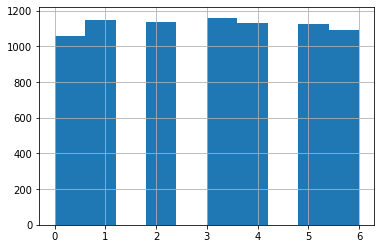

In [6]:
targetS.hist()

## Realizando 30 rodadas de Teste com KNN


- RODADA 0 - Semente 5901 -

- Acurácia 0.7190152801358234 -
- Sensibilidade [0.74917492 0.60240964 0.71386431 0.77108434 0.53055556 0.74418605
 0.93063584] -

              precision    recall  f1-score   support

      Normal       0.68      0.75      0.71       303
        HI-1       0.52      0.60      0.56       332
        HI-2       0.69      0.71      0.70       339
        HI-3       0.79      0.77      0.78       332
        LI-1       0.61      0.53      0.57       360
        LI-2       0.81      0.74      0.78       344
        LI-3       0.98      0.93      0.95       346

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


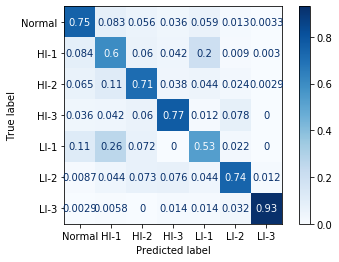


- RODADA 1 - Semente 4406 -

- Acurácia 0.7062818336162988 -
- Sensibilidade [0.75083056 0.54010695 0.66959064 0.78484848 0.51895044 0.77745665
 0.940625  ] -

              precision    recall  f1-score   support

      Normal       0.66      0.75      0.70       301
        HI-1       0.53      0.54      0.54       374
        HI-2       0.67      0.67      0.67       342
        HI-3       0.78      0.78      0.78       330
        LI-1       0.58      0.52      0.55       343
        LI-2       0.79      0.78      0.79       346
        LI-3       0.94      0.94      0.94       320

    accuracy                           0.71      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


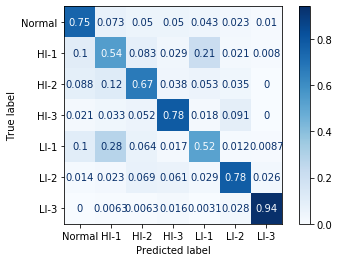


- RODADA 2 - Semente 563 -

- Acurácia 0.7126485568760611 -
- Sensibilidade [0.6863354  0.5821727  0.6977492  0.75811209 0.58103976 0.74867725
 0.94375   ] -

              precision    recall  f1-score   support

      Normal       0.73      0.69      0.71       322
        HI-1       0.55      0.58      0.57       359
        HI-2       0.63      0.70      0.66       311
        HI-3       0.76      0.76      0.76       339
        LI-1       0.56      0.58      0.57       327
        LI-2       0.85      0.75      0.80       378
        LI-3       0.97      0.94      0.96       320

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


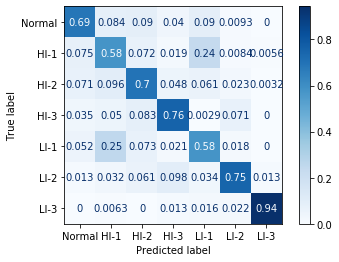


- RODADA 3 - Semente 4386 -

- Acurácia 0.7173174872665535 -
- Sensibilidade [0.70588235 0.58982036 0.65963855 0.80911681 0.54444444 0.77456647
 0.96129032] -

              precision    recall  f1-score   support

      Normal       0.68      0.71      0.69       323
        HI-1       0.48      0.59      0.53       334
        HI-2       0.71      0.66      0.68       332
        HI-3       0.80      0.81      0.81       351
        LI-1       0.62      0.54      0.58       360
        LI-2       0.84      0.77      0.80       346
        LI-3       0.97      0.96      0.97       310

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


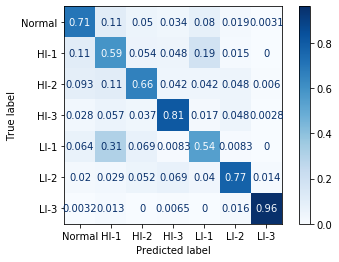


- RODADA 4 - Semente 265 -

- Acurácia 0.7215619694397284 -
- Sensibilidade [0.69875776 0.58356164 0.73011364 0.79369628 0.54934211 0.7696793
 0.92523364] -

              precision    recall  f1-score   support

      Normal       0.70      0.70      0.70       322
        HI-1       0.56      0.58      0.57       365
        HI-2       0.71      0.73      0.72       352
        HI-3       0.78      0.79      0.79       349
        LI-1       0.53      0.55      0.54       304
        LI-2       0.84      0.77      0.80       343
        LI-3       0.98      0.93      0.95       321

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


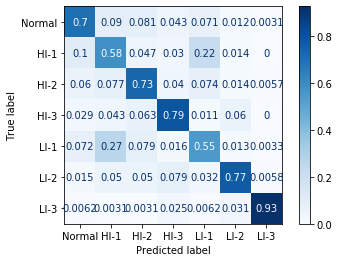


- RODADA 5 - Semente 6055 -

- Acurácia 0.7113752122241087 -
- Sensibilidade [0.6993865  0.57988166 0.64841499 0.77053824 0.5377907  0.78405316
 0.96253602] -

              precision    recall  f1-score   support

      Normal       0.71      0.70      0.70       326
        HI-1       0.49      0.58      0.53       338
        HI-2       0.65      0.65      0.65       347
        HI-3       0.82      0.77      0.80       353
        LI-1       0.57      0.54      0.55       344
        LI-2       0.82      0.78      0.80       301
        LI-3       0.99      0.96      0.97       347

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


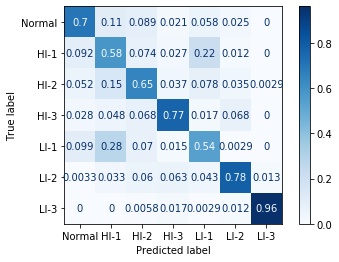


- RODADA 6 - Semente 2220 -

- Acurácia 0.7024617996604414 -
- Sensibilidade [0.73015873 0.57522124 0.66193182 0.79532164 0.50872093 0.74709302
 0.915625  ] -

              precision    recall  f1-score   support

      Normal       0.66      0.73      0.69       315
        HI-1       0.50      0.58      0.53       339
        HI-2       0.72      0.66      0.69       352
        HI-3       0.75      0.80      0.77       342
        LI-1       0.57      0.51      0.54       344
        LI-2       0.81      0.75      0.78       344
        LI-3       0.96      0.92      0.94       320

    accuracy                           0.70      2356
   macro avg       0.71      0.70      0.71      2356
weighted avg       0.71      0.70      0.70      2356

Matriz de confusão normalizada


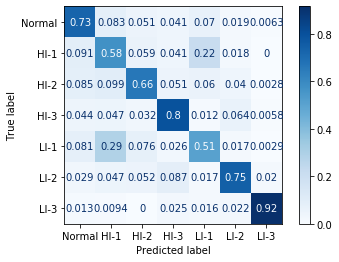


- RODADA 7 - Semente 5913 -

- Acurácia 0.7088285229202037 -
- Sensibilidade [0.68615385 0.62776025 0.65568862 0.82089552 0.4738292  0.79591837
 0.91150442] -

              precision    recall  f1-score   support

      Normal       0.69      0.69      0.69       325
        HI-1       0.47      0.63      0.54       317
        HI-2       0.71      0.66      0.68       334
        HI-3       0.77      0.82      0.79       335
        LI-1       0.59      0.47      0.52       363
        LI-2       0.83      0.80      0.81       343
        LI-3       0.96      0.91      0.93       339

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


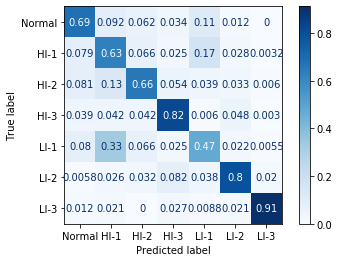


- RODADA 8 - Semente 73 -

- Acurácia 0.7338709677419355 -
- Sensibilidade [0.73701299 0.56       0.72451791 0.80397727 0.59936909 0.79113924
 0.91428571] -

              precision    recall  f1-score   support

      Normal       0.70      0.74      0.72       308
        HI-1       0.56      0.56      0.56       350
        HI-2       0.71      0.72      0.72       363
        HI-3       0.81      0.80      0.81       352
        LI-1       0.58      0.60      0.59       317
        LI-2       0.80      0.79      0.80       316
        LI-3       0.98      0.91      0.95       350

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.74      0.73      0.74      2356

Matriz de confusão normalizada


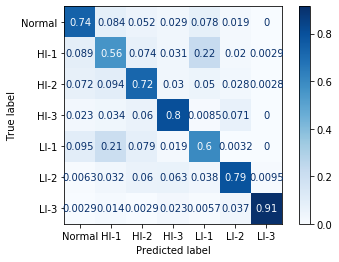


- RODADA 9 - Semente 7884 -

- Acurácia 0.7101018675721562 -
- Sensibilidade [0.71518987 0.58479532 0.6572238  0.78347578 0.51506024 0.77044025
 0.94186047] -

              precision    recall  f1-score   support

      Normal       0.69      0.72      0.70       316
        HI-1       0.48      0.58      0.53       342
        HI-2       0.73      0.66      0.69       353
        HI-3       0.79      0.78      0.79       351
        LI-1       0.55      0.52      0.53       332
        LI-2       0.80      0.77      0.78       318
        LI-3       0.97      0.94      0.96       344

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


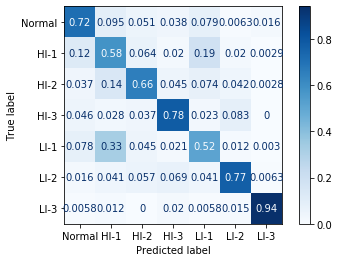


- RODADA 10 - Semente 5765 -

- Acurácia 0.7096774193548387 -
- Sensibilidade [0.67774086 0.61651917 0.65885417 0.75862069 0.54705882 0.78041543
 0.95439739] -

              precision    recall  f1-score   support

      Normal       0.63      0.68      0.65       301
        HI-1       0.50      0.62      0.56       339
        HI-2       0.72      0.66      0.69       384
        HI-3       0.82      0.76      0.79       348
        LI-1       0.59      0.55      0.57       340
        LI-2       0.81      0.78      0.79       337
        LI-3       0.97      0.95      0.96       307

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


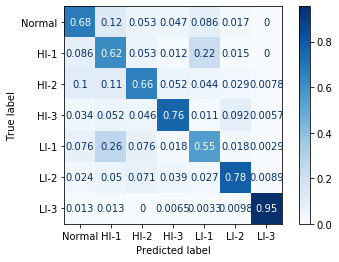


- RODADA 11 - Semente 7174 -

- Acurácia 0.7236842105263158 -
- Sensibilidade [0.70200573 0.61764706 0.67029973 0.80243161 0.54682779 0.79936306
 0.94478528] -

              precision    recall  f1-score   support

      Normal       0.75      0.70      0.73       349
        HI-1       0.51      0.62      0.56       340
        HI-2       0.76      0.67      0.71       367
        HI-3       0.76      0.80      0.78       329
        LI-1       0.57      0.55      0.56       331
        LI-2       0.80      0.80      0.80       314
        LI-3       0.99      0.94      0.97       326

    accuracy                           0.72      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


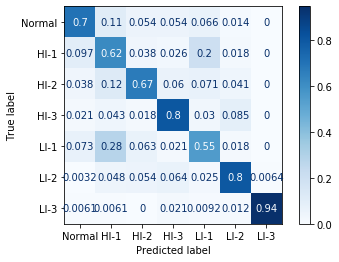


- RODADA 12 - Semente 3630 -

- Acurácia 0.7134974533106961 -
- Sensibilidade [0.76086957 0.58529412 0.70670391 0.76724138 0.51461988 0.74643875
 0.94576271] -

              precision    recall  f1-score   support

      Normal       0.68      0.76      0.72       322
        HI-1       0.52      0.59      0.55       340
        HI-2       0.69      0.71      0.70       358
        HI-3       0.81      0.77      0.79       348
        LI-1       0.56      0.51      0.54       342
        LI-2       0.83      0.75      0.78       351
        LI-3       0.98      0.95      0.96       295

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


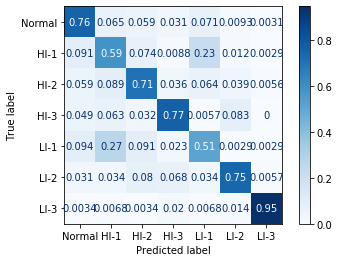


- RODADA 13 - Semente 2590 -

- Acurácia 0.7016129032258065 -
- Sensibilidade [0.68168168 0.5813253  0.66981132 0.75811209 0.5264624  0.76571429
 0.94153846] -

              precision    recall  f1-score   support

      Normal       0.68      0.68      0.68       333
        HI-1       0.48      0.58      0.53       332
        HI-2       0.61      0.67      0.64       318
        HI-3       0.81      0.76      0.78       339
        LI-1       0.62      0.53      0.57       359
        LI-2       0.82      0.77      0.79       350
        LI-3       0.96      0.94      0.95       325

    accuracy                           0.70      2356
   macro avg       0.71      0.70      0.71      2356
weighted avg       0.71      0.70      0.70      2356

Matriz de confusão normalizada


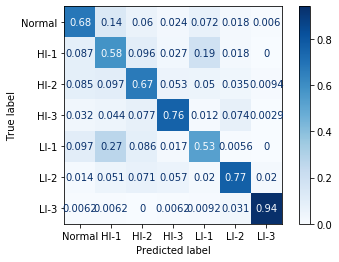


- RODADA 14 - Semente 6057 -

- Acurácia 0.7266553480475382 -
- Sensibilidade [0.75649351 0.57926829 0.7005814  0.75       0.56741573 0.77653631
 0.96153846] -

              precision    recall  f1-score   support

      Normal       0.70      0.76      0.73       308
        HI-1       0.51      0.58      0.54       328
        HI-2       0.71      0.70      0.70       344
        HI-3       0.78      0.75      0.76       324
        LI-1       0.62      0.57      0.59       356
        LI-2       0.83      0.78      0.80       358
        LI-3       0.97      0.96      0.97       338

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


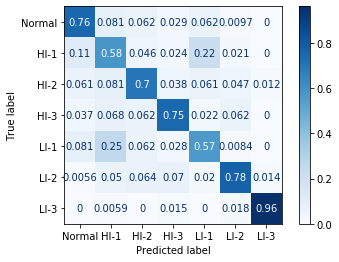


- RODADA 15 - Semente 3690 -

- Acurácia 0.7317487266553481 -
- Sensibilidade [0.69254658 0.59375    0.70738636 0.80924855 0.57267442 0.7969697
 0.94152047] -

              precision    recall  f1-score   support

      Normal       0.68      0.69      0.68       322
        HI-1       0.52      0.59      0.56       320
        HI-2       0.75      0.71      0.73       352
        HI-3       0.82      0.81      0.81       346
        LI-1       0.57      0.57      0.57       344
        LI-2       0.86      0.80      0.83       330
        LI-3       0.96      0.94      0.95       342

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


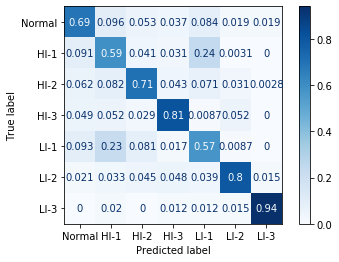


- RODADA 16 - Semente 7614 -

- Acurácia 0.7207130730050934 -
- Sensibilidade [0.71197411 0.56034483 0.69340974 0.78089888 0.55351682 0.80466472
 0.94444444] -

              precision    recall  f1-score   support

      Normal       0.67      0.71      0.69       309
        HI-1       0.54      0.56      0.55       348
        HI-2       0.72      0.69      0.71       349
        HI-3       0.77      0.78      0.78       356
        LI-1       0.56      0.55      0.56       327
        LI-2       0.82      0.80      0.81       343
        LI-3       0.98      0.94      0.96       324

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


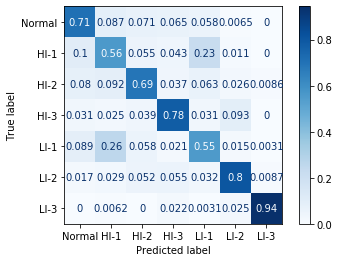


- RODADA 17 - Semente 6146 -

- Acurácia 0.7241086587436333 -
- Sensibilidade [0.73668639 0.61812298 0.68047337 0.80337079 0.53760446 0.75766871
 0.93939394] -

              precision    recall  f1-score   support

      Normal       0.69      0.74      0.71       338
        HI-1       0.48      0.62      0.54       309
        HI-2       0.72      0.68      0.70       338
        HI-3       0.81      0.80      0.81       356
        LI-1       0.63      0.54      0.58       359
        LI-2       0.82      0.76      0.79       326
        LI-3       0.97      0.94      0.96       330

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.73      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


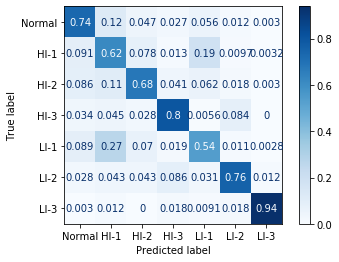


- RODADA 18 - Semente 5571 -

- Acurácia 0.7304753820033956 -
- Sensibilidade [0.7388535  0.5801105  0.73432836 0.80606061 0.54189944 0.78594249
 0.9505814 ] -

              precision    recall  f1-score   support

      Normal       0.69      0.74      0.72       314
        HI-1       0.53      0.58      0.55       362
        HI-2       0.70      0.73      0.72       335
        HI-3       0.82      0.81      0.81       330
        LI-1       0.60      0.54      0.57       358
        LI-2       0.83      0.79      0.81       313
        LI-3       0.98      0.95      0.96       344

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


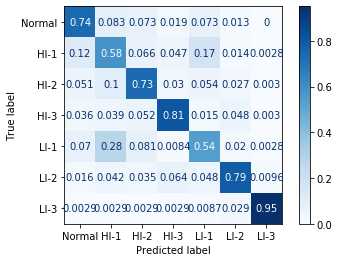


- RODADA 19 - Semente 6164 -

- Acurácia 0.7372665534804754 -
- Sensibilidade [0.72945205 0.62464986 0.73156342 0.80116959 0.51335312 0.82051282
 0.9408284 ] -

              precision    recall  f1-score   support

      Normal       0.68      0.73      0.70       292
        HI-1       0.53      0.62      0.58       357
        HI-2       0.73      0.73      0.73       339
        HI-3       0.82      0.80      0.81       342
        LI-1       0.59      0.51      0.55       337
        LI-2       0.86      0.82      0.84       351
        LI-3       0.99      0.94      0.96       338

    accuracy                           0.74      2356
   macro avg       0.74      0.74      0.74      2356
weighted avg       0.74      0.74      0.74      2356

Matriz de confusão normalizada


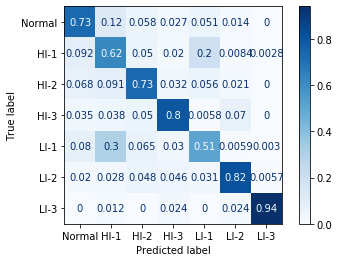


- RODADA 20 - Semente 3857 -

- Acurácia 0.716044142614601 -
- Sensibilidade [0.70926518 0.53468208 0.69387755 0.80515759 0.56857143 0.75
 0.96119403] -

              precision    recall  f1-score   support

      Normal       0.67      0.71      0.69       313
        HI-1       0.49      0.53      0.51       346
        HI-2       0.73      0.69      0.71       343
        HI-3       0.85      0.81      0.83       349
        LI-1       0.55      0.57      0.56       350
        LI-2       0.81      0.75      0.78       320
        LI-3       0.97      0.96      0.97       335

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


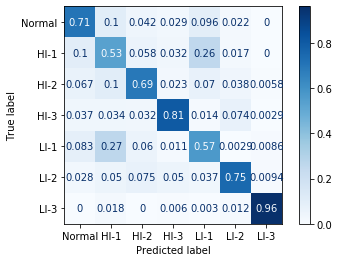


- RODADA 21 - Semente 1517 -

- Acurácia 0.7062818336162988 -
- Sensibilidade [0.70061728 0.56626506 0.71732523 0.72651934 0.53276353 0.7641791
 0.9504644 ] -

              precision    recall  f1-score   support

      Normal       0.67      0.70      0.68       324
        HI-1       0.51      0.57      0.54       332
        HI-2       0.63      0.72      0.67       329
        HI-3       0.82      0.73      0.77       362
        LI-1       0.59      0.53      0.56       351
        LI-2       0.79      0.76      0.78       335
        LI-3       0.98      0.95      0.97       323

    accuracy                           0.71      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


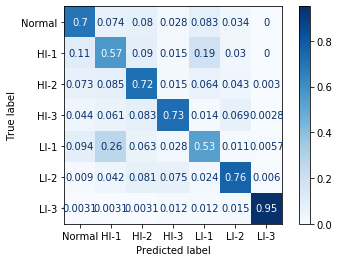


- RODADA 22 - Semente 2170 -

- Acurácia 0.7249575551782682 -
- Sensibilidade [0.72948328 0.5922619  0.68168168 0.79733333 0.52046784 0.81230769
 0.95253165] -

              precision    recall  f1-score   support

      Normal       0.70      0.73      0.71       329
        HI-1       0.48      0.59      0.53       336
        HI-2       0.71      0.68      0.69       333
        HI-3       0.84      0.80      0.82       375
        LI-1       0.61      0.52      0.56       342
        LI-2       0.82      0.81      0.82       325
        LI-3       0.97      0.95      0.96       316

    accuracy                           0.72      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


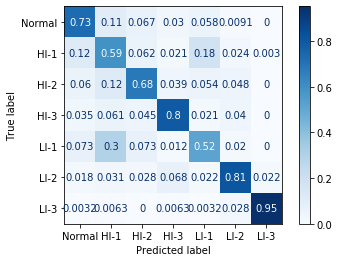


- RODADA 23 - Semente 7855 -

- Acurácia 0.7147707979626485 -
- Sensibilidade [0.69131833 0.59383754 0.68945869 0.73469388 0.56615385 0.78078078
 0.94940476] -

              precision    recall  f1-score   support

      Normal       0.67      0.69      0.68       311
        HI-1       0.54      0.59      0.57       357
        HI-2       0.69      0.69      0.69       351
        HI-3       0.81      0.73      0.77       343
        LI-1       0.59      0.57      0.58       325
        LI-2       0.80      0.78      0.79       333
        LI-3       0.95      0.95      0.95       336

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


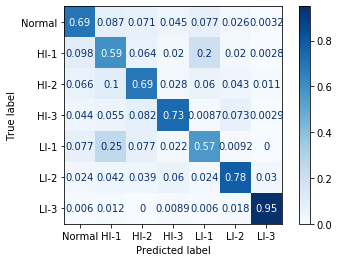


- RODADA 24 - Semente 3764 -

- Acurácia 0.7143463497453311 -
- Sensibilidade [0.73913043 0.57771261 0.65625    0.80609418 0.52492669 0.7791411
 0.92261905] -

              precision    recall  f1-score   support

      Normal       0.66      0.74      0.69       299
        HI-1       0.50      0.58      0.53       341
        HI-2       0.75      0.66      0.70       352
        HI-3       0.83      0.81      0.82       361
        LI-1       0.57      0.52      0.55       341
        LI-2       0.77      0.78      0.77       326
        LI-3       0.97      0.92      0.95       336

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


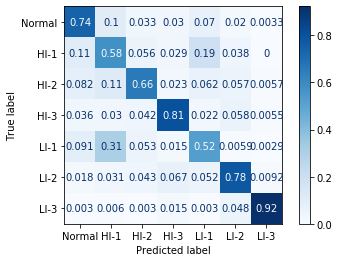


- RODADA 25 - Semente 2416 -

- Acurácia 0.7117996604414262 -
- Sensibilidade [0.70886076 0.58923513 0.69480519 0.79608939 0.49230769 0.75749319
 0.93617021] -

              precision    recall  f1-score   support

      Normal       0.65      0.71      0.68       316
        HI-1       0.54      0.59      0.56       353
        HI-2       0.65      0.69      0.67       308
        HI-3       0.81      0.80      0.80       358
        LI-1       0.53      0.49      0.51       325
        LI-2       0.83      0.76      0.79       367
        LI-3       0.99      0.94      0.96       329

    accuracy                           0.71      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


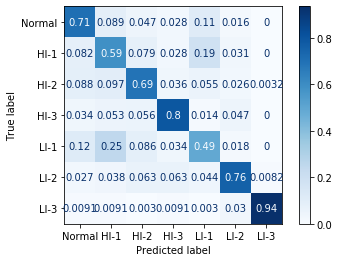


- RODADA 26 - Semente 7564 -

- Acurácia 0.7190152801358234 -
- Sensibilidade [0.71826625 0.5968254  0.70317003 0.76106195 0.52247191 0.80298507
 0.92961877] -

              precision    recall  f1-score   support

      Normal       0.70      0.72      0.71       323
        HI-1       0.47      0.60      0.53       315
        HI-2       0.70      0.70      0.70       347
        HI-3       0.79      0.76      0.78       339
        LI-1       0.62      0.52      0.57       356
        LI-2       0.81      0.80      0.81       335
        LI-3       0.98      0.93      0.95       341

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


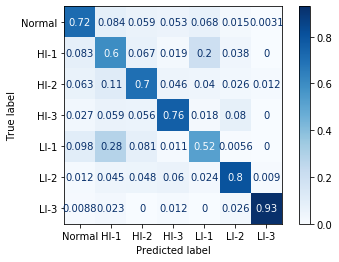


- RODADA 27 - Semente 471 -

- Acurácia 0.7249575551782682 -
- Sensibilidade [0.75337838 0.55681818 0.70481928 0.79117647 0.56772334 0.76012461
 0.9375    ] -

              precision    recall  f1-score   support

      Normal       0.65      0.75      0.70       296
        HI-1       0.56      0.56      0.56       352
        HI-2       0.67      0.70      0.69       332
        HI-3       0.83      0.79      0.81       340
        LI-1       0.58      0.57      0.57       347
        LI-2       0.82      0.76      0.79       321
        LI-3       0.97      0.94      0.96       368

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


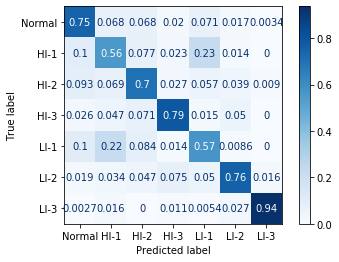


- RODADA 28 - Semente 7698 -

- Acurácia 0.7101018675721562 -
- Sensibilidade [0.74691358 0.55891239 0.68597561 0.74929577 0.53191489 0.76901408
 0.91916168] -

              precision    recall  f1-score   support

      Normal       0.66      0.75      0.70       324
        HI-1       0.49      0.56      0.52       331
        HI-2       0.67      0.69      0.68       328
        HI-3       0.80      0.75      0.77       355
        LI-1       0.58      0.53      0.55       329
        LI-2       0.82      0.77      0.79       355
        LI-3       0.98      0.92      0.95       334

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


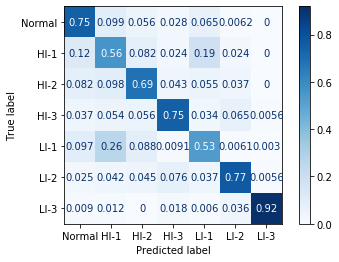


- RODADA 29 - Semente 4933 -

- Acurácia 0.7181663837011885 -
- Sensibilidade [0.76025237 0.54347826 0.67919075 0.79387187 0.50892857 0.80232558
 0.93072289] -

              precision    recall  f1-score   support

      Normal       0.71      0.76      0.73       317
        HI-1       0.46      0.54      0.50       322
        HI-2       0.72      0.68      0.70       346
        HI-3       0.82      0.79      0.81       359
        LI-1       0.57      0.51      0.54       336
        LI-2       0.82      0.80      0.81       344
        LI-3       0.96      0.93      0.94       332

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


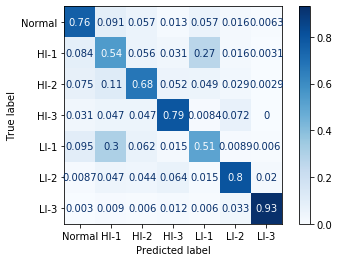

In [7]:
accuracy, recall, confusion = test_30_knn(x=chainDF.values, y=targetS.values, y_labels=target_labels, k_vizinhos=5)

## Gerando DataFrame de Acurácia e Sensibilidade por rodada

In [8]:
metricDF = pd.DataFrame(
    data=recall,
    columns=[f'S - {name}' for name in target_labels])

metricDF['Acurácia'] = accuracy
metricDF

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
0,0.749175,0.602410,0.713864,0.771084,0.530556,0.744186,0.930636,0.719015
1,0.750831,0.540107,0.669591,0.784848,0.518950,0.777457,0.940625,0.706282
2,0.686335,0.582173,0.697749,0.758112,0.581040,0.748677,0.943750,0.712649
3,0.705882,0.589820,0.659639,0.809117,0.544444,0.774566,0.961290,0.717317
4,0.698758,0.583562,0.730114,0.793696,0.549342,0.769679,0.925234,0.721562
5,0.699387,0.579882,0.648415,0.770538,0.537791,0.784053,0.962536,0.711375
6,0.730159,0.575221,0.661932,0.795322,0.508721,0.747093,0.915625,0.702462
7,0.686154,0.627760,0.655689,0.820896,0.473829,0.795918,0.911504,0.708829
8,0.737013,0.560000,0.724518,0.803977,0.599369,0.791139,0.914286,0.733871
9,0.715190,0.584795,0.657224,0.783476,0.515060,0.770440,0.941860,0.710102


In [9]:
metricDF.describe()

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.720156,0.583093,0.689290,0.782984,0.537226,0.777193,0.940051,0.717445
std,0.025628,0.024015,0.025117,0.024474,0.027411,0.020986,0.014350,0.009180
min,0.677741,0.534682,0.648415,0.726519,0.473829,0.744186,0.911504,0.701613
25%,0.699694,0.568504,0.669646,0.762607,0.519330,0.761138,0.930658,0.710420
50%,0.716728,0.582867,0.691434,0.792436,0.535184,0.776996,0.941529,0.716681
75%,0.739061,0.593816,0.706233,0.803136,0.552473,0.794724,0.950199,0.724003
max,0.760870,0.627760,0.734328,0.820896,0.599369,0.820513,0.962536,0.737267


## Gerando _DataFrame_ da matriz de confusão por rodada

In [10]:
confusion_resized = np.resize(confusion, (30, 49))

confusion_labels = [f"T {truelabel} x P {predlabel}" for truelabel in target_labels for predlabel in target_labels]

confusionTurnDF = pd.DataFrame(
    data=confusion_resized,
    columns=confusion_labels
)

confusionTurnDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T Normal x P Normal,30.0,227.966667,9.946350,204.0,223.00,227.0,232.00,249.0
T Normal x P HI-1,30.0,29.833333,5.831445,20.0,26.00,29.0,34.25,46.0
T Normal x P HI-2,30.0,19.033333,4.398145,10.0,16.00,18.5,21.50,29.0
T Normal x P HI-3,30.0,10.900000,3.717155,4.0,9.00,10.0,13.00,20.0
T Normal x P LI-1,30.0,23.033333,5.248864,13.0,19.00,23.0,25.75,37.0
T Normal x P LI-2,30.0,4.966667,2.008316,2.0,4.00,5.0,6.00,11.0
T Normal x P LI-3,30.0,0.966667,1.473521,0.0,0.00,0.5,1.00,6.0
T HI-1 x P Normal,30.0,33.100000,4.823434,25.0,29.00,33.0,36.00,42.0
T HI-1 x P HI-1,30.0,198.333333,10.172083,175.0,191.50,197.0,206.50,223.0
T HI-1 x P HI-2,30.0,22.033333,4.992984,13.0,18.25,21.0,25.75,32.0


## Matriz de confusão média

In [11]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_sum = sum(confusion)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_mean = [[x / 30 for x in line] for line in confusion_sum]

confusionDF = pd.DataFrame(
    data=confusion_mean,
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)

confusionDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,227.966667,29.833333,19.033333,10.900000,23.033333,4.966667,0.966667
True - HI-1,33.100000,198.333333,22.033333,9.200000,70.933333,6.200000,0.533333
True - HI-2,24.433333,35.466667,236.100000,13.500000,19.866667,11.633333,1.600000
True - HI-3,12.000000,16.133333,17.700000,271.266667,5.133333,23.700000,0.500000
True - LI-1,29.733333,93.100000,24.533333,6.166667,183.433333,3.900000,0.766667
True - LI-2,5.666667,13.100000,18.500000,22.533333,11.100000,261.900000,4.300000
True - LI-3,1.400000,3.300000,0.433333,4.900000,2.066667,7.800000,311.300000


## Matriz de confusão média normalizada

In [12]:
confusionNormDF = pd.DataFrame(
    data=[normalize(row) for row in confusion_mean],
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)

confusionNormDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,0.719819,0.094201,0.060099,0.034417,0.072729,0.015683,0.003052
True - HI-1,0.097258,0.582762,0.064740,0.027032,0.208423,0.018217,0.001567
True - HI-2,0.071317,0.103522,0.689142,0.039405,0.057988,0.033956,0.004670
True - HI-3,0.034639,0.046570,0.051092,0.783027,0.014818,0.068411,0.001443
True - LI-1,0.087033,0.272514,0.071812,0.018051,0.536930,0.011416,0.002244
True - LI-2,0.016810,0.038861,0.054880,0.066845,0.032928,0.776921,0.012756
True - LI-3,0.004227,0.009964,0.001308,0.014795,0.006240,0.023551,0.939915


## Gerando _DataFrame_ da matriz de confusão binarizada por rodada

In [13]:
confusionBinary = [binarize(matrix) for matrix in confusion]

confusionBinaryDF = pd.DataFrame(
    data=np.resize(confusionBinary, (30, 4)),
    columns=['true normal', 'false fail','false normal', 'true fail']
)

confusionBinaryDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
true normal,30.0,227.966667,9.946350,204.0,223.00,227.0,232.00,249.0
false fail,30.0,88.733333,9.878340,73.0,79.50,89.5,97.00,106.0
false normal,30.0,106.333333,10.052735,81.0,100.25,107.5,113.00,124.0
true fail,30.0,1932.966667,12.664050,1907.0,1923.50,1936.0,1939.75,1962.0


## Matriz de confusão binarizada média

In [14]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_binary_sum = sum(confusionBinary)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_binary_mean = [[x / 30 for x in line] for line in confusion_binary_sum]

confusionBDF = pd.DataFrame(
    data=confusion_binary_mean,
    columns=['Pred-Normal', 'Pred-Fail'],
    index=['True-Normal', 'True-Fail']
)

confusionBDF

,Pred-Normal,Pred-Fail
True-Normal,227.966667,88.733333
True-Fail,106.333333,1932.966667


## Matriz de confusão binarizada média normalizada

In [15]:
confusionBDF = pd.DataFrame(
    data=[normalize(row) for row in confusion_binary_mean],
    columns=['Pred-Normal', 'Pred-Fail'],
    index=['True-Normal', 'True-Fail']
)

confusionBDF

,Pred-Normal,Pred-Fail
True-Normal,0.719819,0.280181
True-Fail,0.052142,0.947858
